<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_8_%E2%80%94_Convolution_Mechanics_(From_Scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8 — Convolution Mechanics (From Scratch)

## Goal

Understand convolution mathematically and implement it manually.

By the end of this week, you should:
- Understand convolution operation
- Implement 2D convolution (forward pass)
- Understand padding and stride
- Implement multi-channel convolution
- Apply real filters to images

No training yet. Only mechanics.

---

# 1. Why Convolution?

Images have:
- Spatial structure
- Local patterns
- Translation properties

Instead of fully connecting pixels,
we learn small filters applied everywhere.

---

# 2. 2D Convolution (Single Channel)

Given:
- Input: H × W
- Kernel: k × k

Output:

Output(i,j) = Σ Σ Input(i+m, j+n) * Kernel(m,n)

Loop intuition:
- Slide kernel over image
- Compute dot product

---

# 3. Stride

Stride controls movement step.

Stride = 1 → move 1 pixel  
Stride = 2 → downsample

Output size:

(H − k)/stride + 1

---

# 4. Padding

Padding adds border around image.

Types:
- Valid (no padding)
- Same (preserve dimension)

Padding helps:
- Preserve information near edges

---

# 5. Multi-Channel Convolution

For RGB image:

Input: H × W × C

Each filter:
- Has depth C
- Produces one feature map

If we use F filters:
- Output depth = F

---

# 6. Feature Maps

Each filter detects:
- Edges
- Textures
- Patterns

Stacking layers creates:
- Hierarchical feature extraction

---

# Coding Exercises

## Question 1: Single Channel Convolution

Implement:
- No padding
- Stride = 1

Test:
- Random matrix
- Known small example

---

## Question 2: Add Padding

Modify your function:
- Zero padding
- Validate dimensions

---

## Question 3: Add Stride

Generalize:
- Arbitrary stride

---

## Question 4: Multi-Channel Convolution

Extend to:
- Input with depth
- Multiple filters

---

## Question 5: Apply Real Filters

Implement Sobel filters:

Sobel X:
[[ -1, 0, 1 ],
 [ -2, 0, 2 ],
 [ -1, 0, 1 ]]

Sobel Y:
[[ -1, -2, -1 ],
 [  0,  0,  0 ],
 [  1,  2,  1 ]]

Apply to grayscale image.
Visualize output.

---

# Conceptual Questions

1. Why does convolution reduce parameters?
2. Why does weight sharing matter?
3. Why is convolution translation equivariant?
4. How does stride affect feature extraction?
5. Why does padding matter?

---

# Outcome of Week 8

After this week, you should:
- Understand convolution deeply
- Implement it without help
- Visualize filter outputs
- Think spatially


**Question 0 — Setup (Run First)**

Saving nobita.jpeg to nobita (2).jpeg


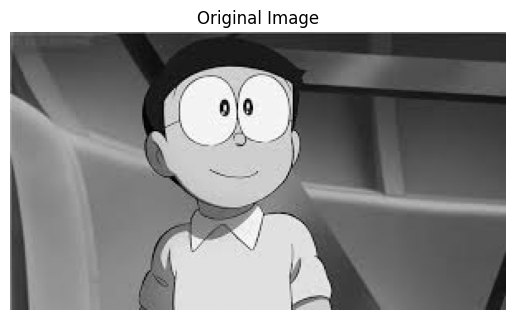

In [4]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = Image.open(filename).convert("L")
image = np.array(img)

plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

Question 1 — Implement Basic Convolution (No Padding, Stride = 1)

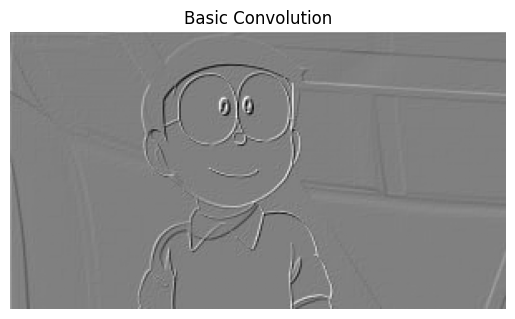

In [10]:
def conv2d_basic(image, kernel):
    H, W = image.shape
    kH, kW = kernel.shape

    out_H = H - kH + 1
    out_W = W - kW + 1

    output = np.zeros((out_H, out_W))

    for i in range(out_H):
        for j in range(out_W):
            patch = image[i:i+kH, j:j+kW]
            output[i, j] = np.sum(patch * kernel)

    return output


kernel = np.array([
    [1, 0],
    [0, -1]
])

result = conv2d_basic(image, kernel)

plt.imshow(result, cmap='gray')
plt.title("Basic Convolution")
plt.axis('off')
plt.show()



**Question 2 — Add Zero Padding**

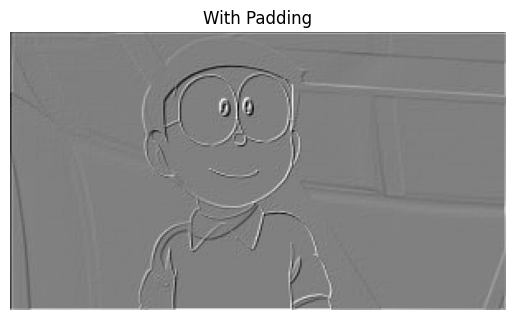

Output Shape: (169, 301)


In [12]:
def conv2d_padding(image, kernel, padding = 0):
  if padding > 0:
    image = np.pad(image, ((padding,padding), (padding,padding)), mode='constant')

  H, W = image.shape
  kH, kW = kernel.shape

  out_H = H - kH + 1
  out_W = W - kW + 1

  output = np.zeros((out_H, out_W))

  for i in range(out_H):
    for j in range(out_W):
      patch = image[i:i+kH, j:j+kW]
      output[i, j] = np.sum(patch * kernel)

  return output


result_pad = conv2d_padding(image, kernel, padding=1)

plt.imshow(result_pad, cmap='gray')
plt.title("With Padding")
plt.axis('off')
plt.show()

print("Output Shape:", result_pad.shape)


**Question 3 — Add Stride**

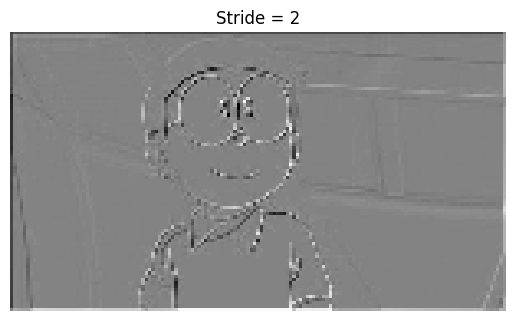

Output Shape: (85, 151)


In [16]:
def conv2d_stride(image, kernel, padding = 0, stride =1):
  if padding > 0:
    image = np.pad(image, ((padding,padding), (padding,padding)), mode='constant')

  H, W = image.shape
  kH, kW = kernel.shape

  out_H = (H - kH) // stride + 1
  out_W = (W - kW) // stride + 1

  output = np.zeros((out_H, out_W))

  out_i = 0
  for i in range(0, H - kW + 1, stride):
    out_j = 0
    for j in range(0, W - kW +1, stride):
      patch = image[i:i+kH, j:j+kW]
      output[out_i, out_j] = np.sum(patch * kernel)
      out_j += 1
    out_i += 1

  return output


result_stride = conv2d_stride(image, kernel, padding=1, stride=2)

plt.imshow(result_stride, cmap='gray')
plt.title("Stride = 2")
plt.axis('off')
plt.show()

print("Output Shape:", result_stride.shape)


**Question 4 — Apply Sobel Filters**

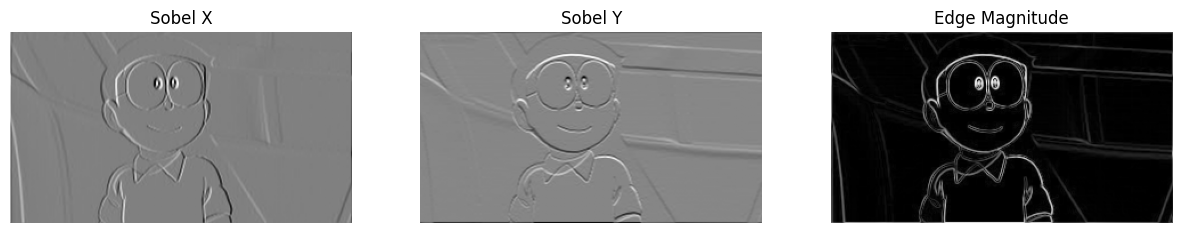

In [17]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
])

gx = conv2d_stride(image, sobel_x, padding=1, stride=1)
gy = conv2d_stride(image, sobel_y, padding=1, stride=1)

edges = np.sqrt(gx**2 + gy**2)

def normalize(x):
  x = x - x.min()
  x = x / x.max()
  return x

gx = normalize(gx)
gy = normalize(gy)
edges = normalize(edges)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.title("Sobel X")
plt.imshow(gx, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Sobel Y")
plt.imshow(gy, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Edge Magnitude")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


**Question 5 — Blur Filter**

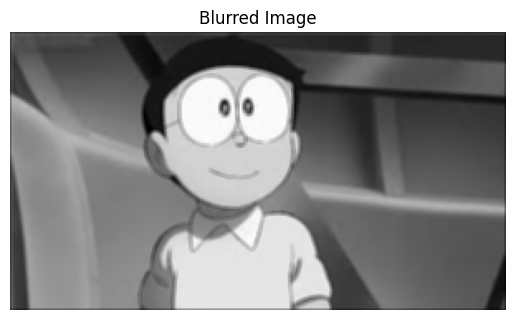

In [18]:
blur = np.ones((3,3)) / 9
blurred = conv2d_stride(image, blur, padding=1, stride=1)

plt.imshow(normalize(blurred), cmap='gray')
plt.title("Blurred Image")
plt.axis('off')
plt.show()